# Assignment 3
### https://github.com/akanyal25/CV

## Question 1 ( sum of squared differences)

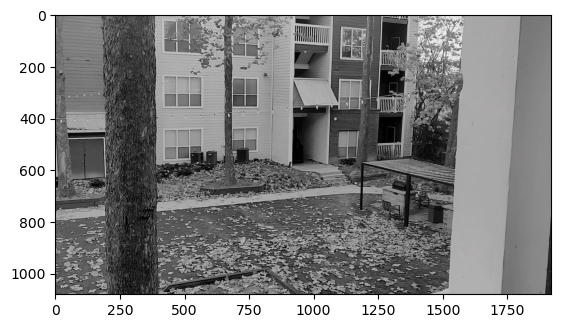

Region of Interest


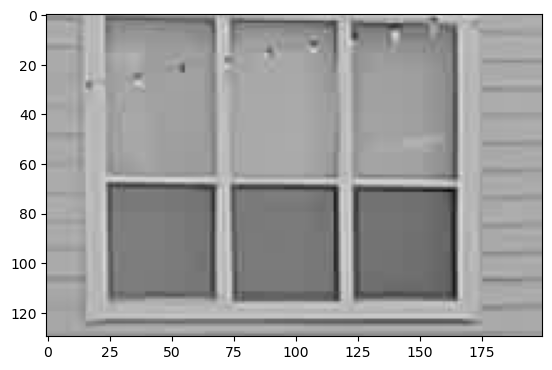

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os


def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

#reading a frame
img = cv2.imread("./Q1/video Frames/0001.jpg")
roi = img[240:370,400:600]
cv2.imwrite("Cropped Image.jpg", roi)

plt.imshow(img)
plt.show()
print("Region of Interest")
plt.imshow(roi)
plt.show()

In [5]:
#Reading frames
images = [
    "./Q1/video Frames/0031.jpg",
    "./Q1/video Frames/0061.jpg",
    "./Q1/video Frames/0091.jpg",
    "./Q1/video Frames/0121.jpg",
    "./Q1/video Frames/0151.jpg",
    "./Q1/video Frames/0181.jpg",
    "./Q1/video Frames/0211.jpg",
    "./Q1/video Frames/0241.jpg",
    "./Q1/video Frames/0271.jpg",
    "./Q1/video Frames/0301.jpg",
    "./Q1/video Frames/0318.jpg"
]
frame = []

for i in images:
    frame.append(cv2.imread(i))
    
def findMatch(frame_num):
    d=dict()
    for i in range(0,600,20):
        for j in range(0,1180,20):
            d[str(i)+":"+str(i+130),str(j)+":"+str(j+200)]=ssd(roi,frame[frame_num][i:i+130,j:j+200])

    #ssd with minimum value is closest 
    a=min(d.items(), key=lambda x: x[1])
    y1,y2=map(int,a[0][0].split(':'))
    x1,x2=map(int,a[0][1].split(':'))
    
    print("Matched Region")
    plt.imshow(frame[frame_num][y1:y2,x1:x2])
    plt.show()
    
    image = cv2.rectangle(frame[frame_num], (x1,y1), (x2,y2), (0, 255, 0), 2)
    print("Frame :"+ str(frame_num+1))
    plt.imshow(image)
    plt.show()


Matched Region


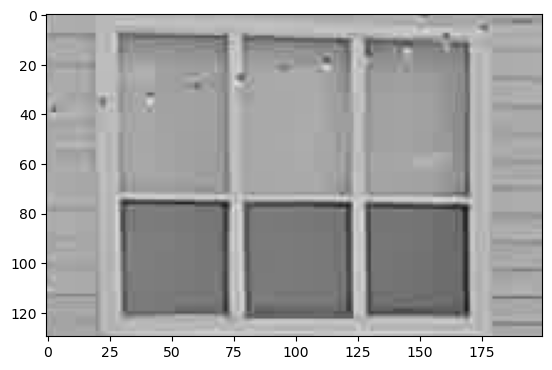

Frame :1


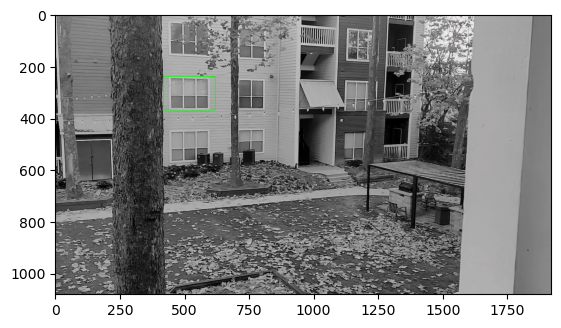

Matched Region


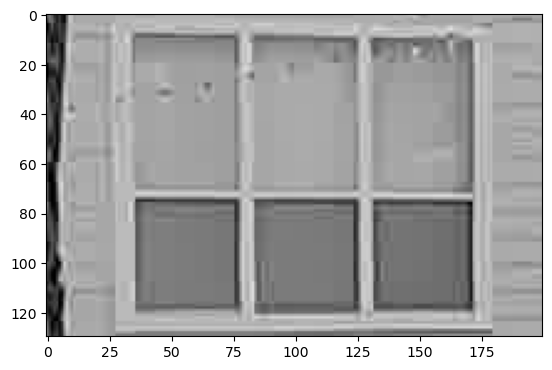

Frame :2


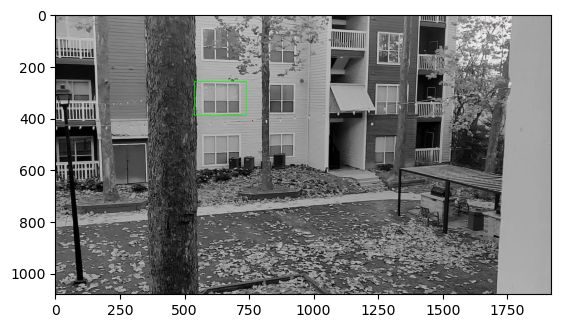

Matched Region


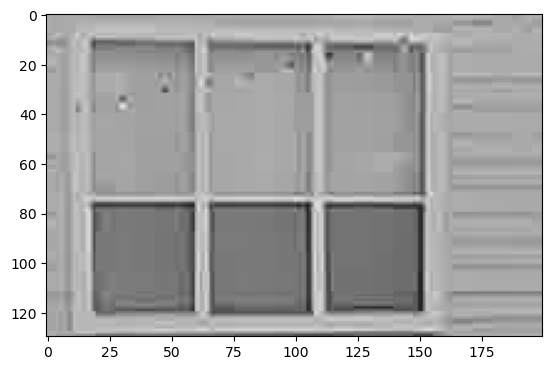

Frame :3


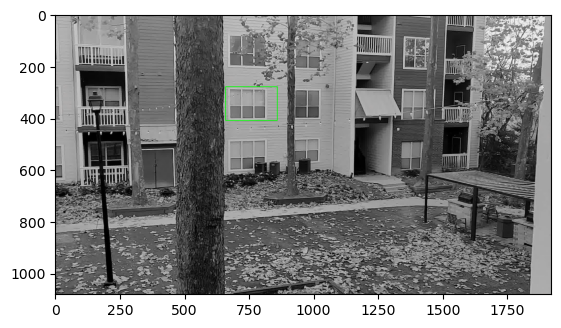

Matched Region


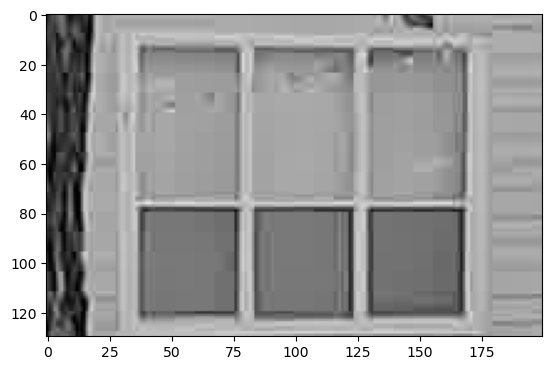

Frame :4


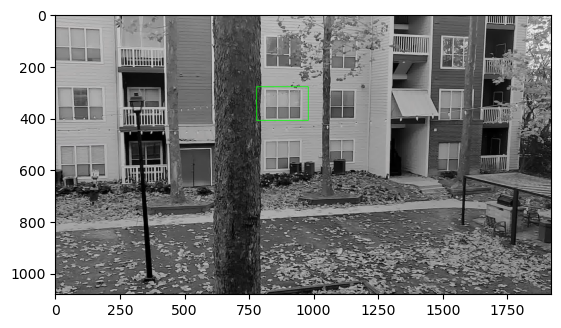

Matched Region


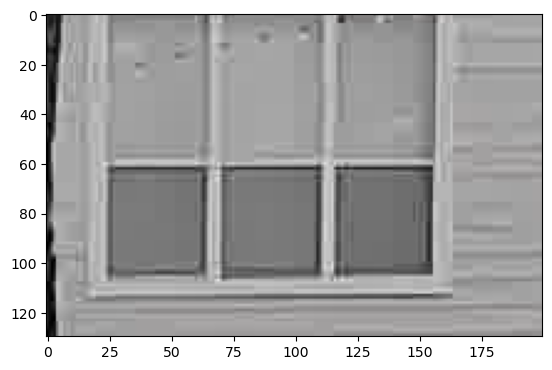

Frame :5


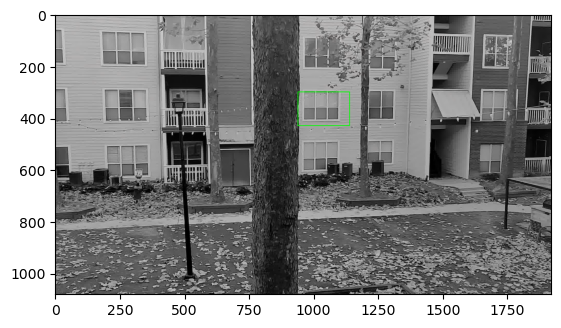

Matched Region


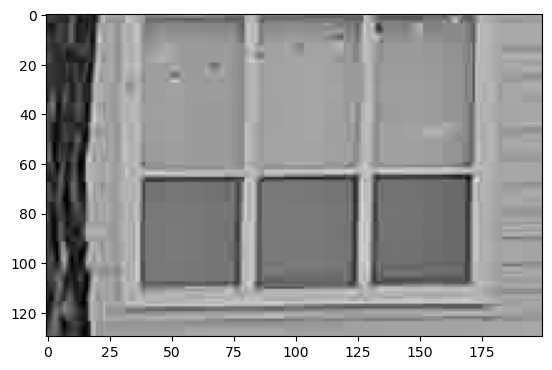

Frame :6


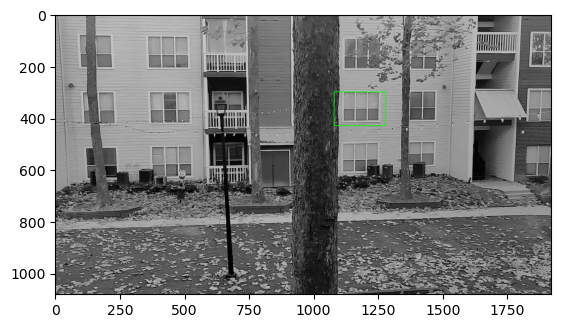

Matched Region


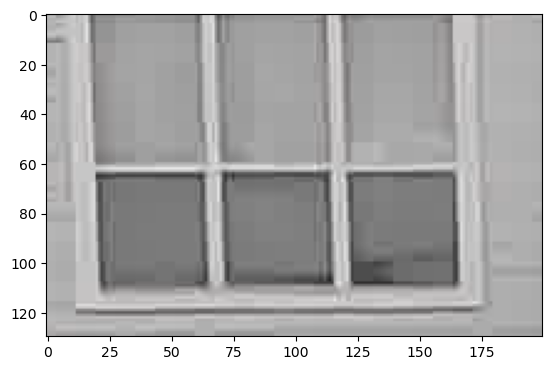

Frame :7


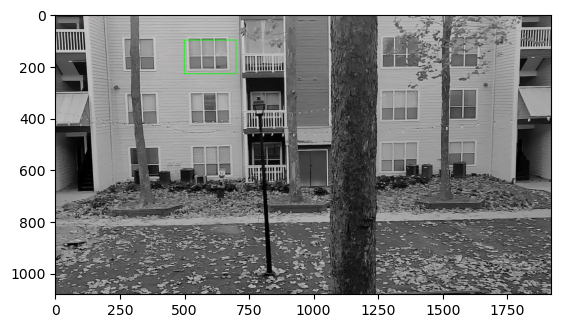

Matched Region


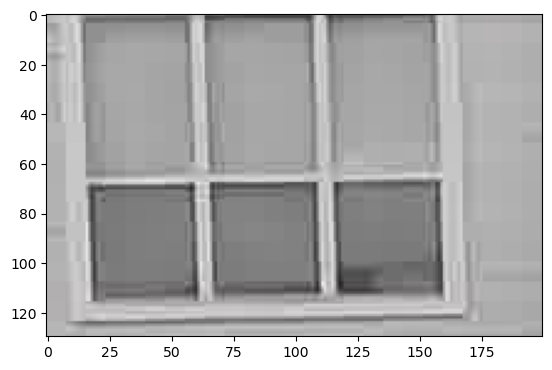

Frame :8


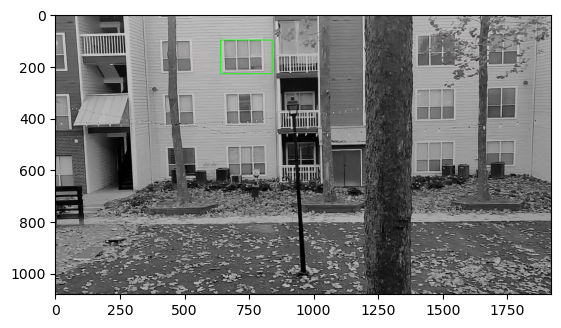

Matched Region


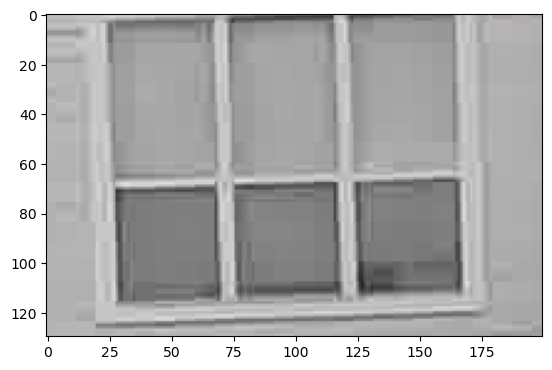

Frame :9


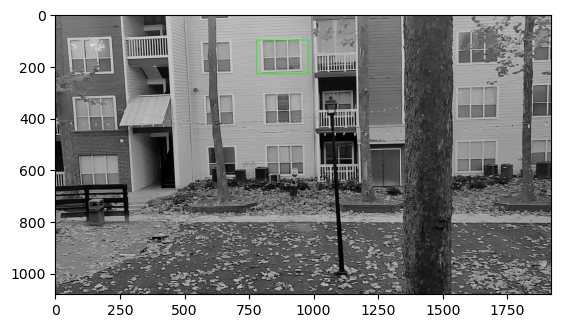

Matched Region


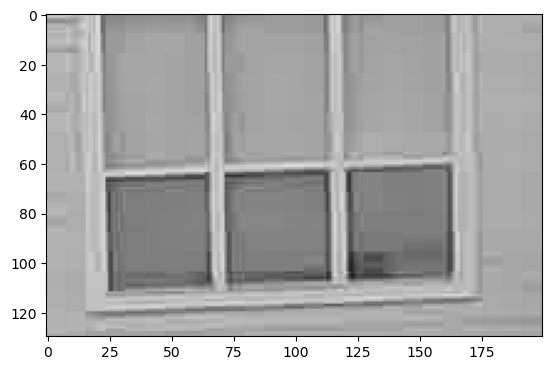

Frame :10


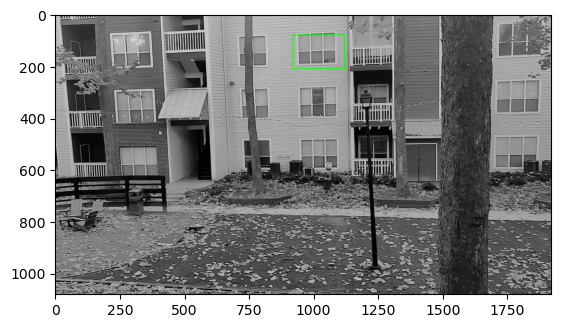

In [6]:
for i in range(0,10):
    findMatch(i)

## Question 2 (Motion tracking estimate)

In [7]:


def motion_est(frame1, frame2):
    Iref=cv2.cvtColor(frame2,cv2.COLOR_BGR2RGB)
    Inext=cv2.cvtColor(frame1,cv2.COLOR_BGR2RGB)
    type(Iref)
    Iref=np.array(Iref).astype(np.float32)
    Inext=np.array(Inext).astype(np.float32)
    kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
    kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
    kernel_t = np.array([[1., 1.], [1., 1.]])*.25
    Iref = Iref / 255. # normalize pixels
    Inext = Inext / 255. # normalize pixels
    Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
    Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
    It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
    Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

    u=np.divide(abs(It),np.sqrt(np.square(Ix)+np.square(Iy)))
    return u

    


def img_align(img1,img2):

    # Convert to grayscale.
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    height, width = img2.shape
    
    # Create ORB detector 
    orb_detector = cv2.ORB_create(1000)

    kp1, d1 = orb_detector.detectAndCompute(img1, None)
    kp2, d2 = orb_detector.detectAndCompute(img2, None)

    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Match the discriptors.
    matches = matcher.match(d1, d2)
    
    # Sort matches on the basis of their Hamming distance.
    matches = sorted(matches, key = lambda x: x.distance)
    
    # Take the top 30 % matches forward.
    matches = matches[:int(len(matches)*0.3)]
    no_of_matches = len(matches)
    # Define empty matrices of shape no_of_matches * 2.
    p1 = np.zeros((no_of_matches, 2))
    p2 = np.zeros((no_of_matches, 2))
 
    for i in range(len(matches)):
        p1[i, :] = kp1[matches[i].queryIdx].pt
        p2[i, :] = kp2[matches[i].trainIdx].pt
    
    # Find the homography matrix.
    homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
    
    # Use this matrix to transform the
    # colored image wrt the reference image.
    aligned_img = cv2.warpPerspective(img1,
                        homography, (width, height))

    print("Strongest 30% matches")
    matched_image = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
    plt.imshow(matched_image)
    plt.show()
    
    return aligned_img

Strongest 30% matches


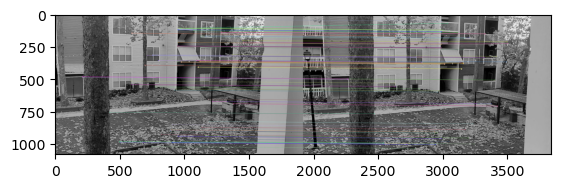

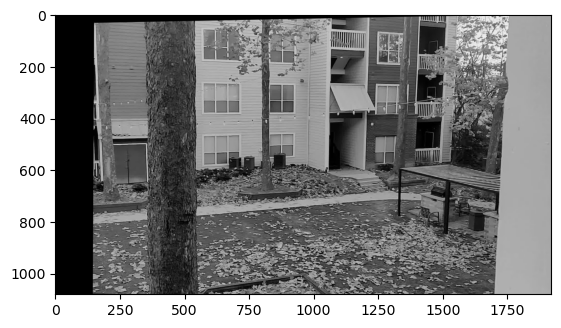

Strongest 30% matches


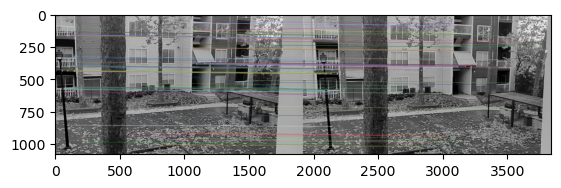

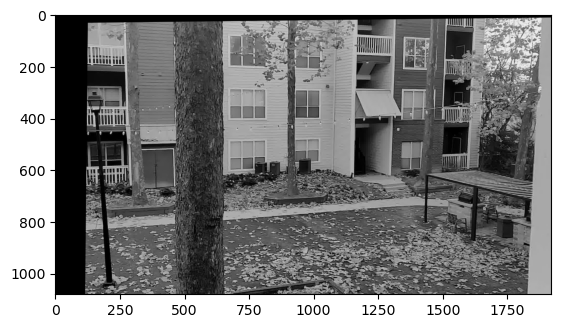

Strongest 30% matches


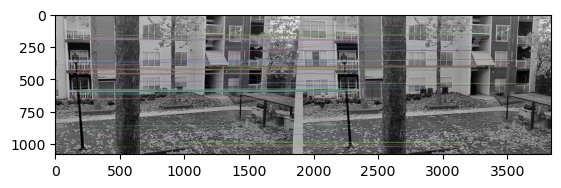

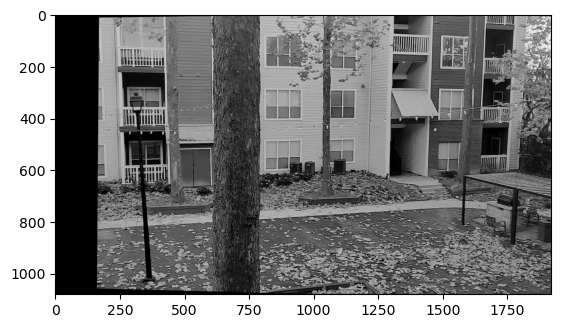

Strongest 30% matches


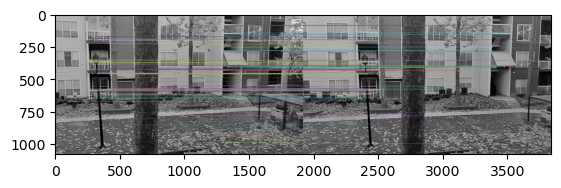

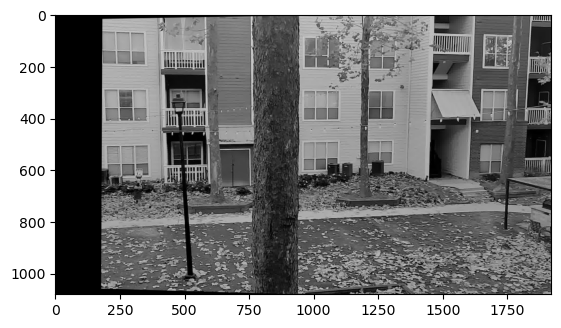

Strongest 30% matches


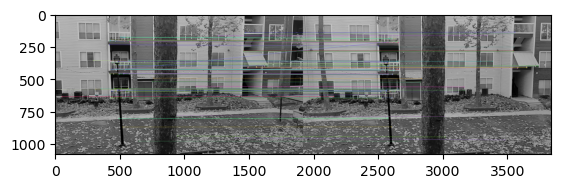

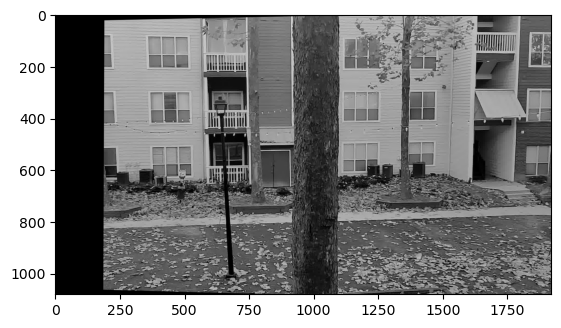

Strongest 30% matches


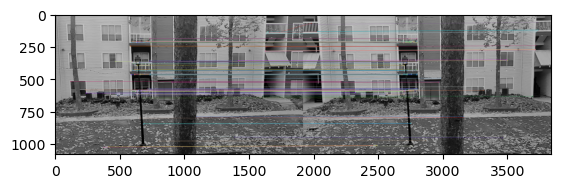

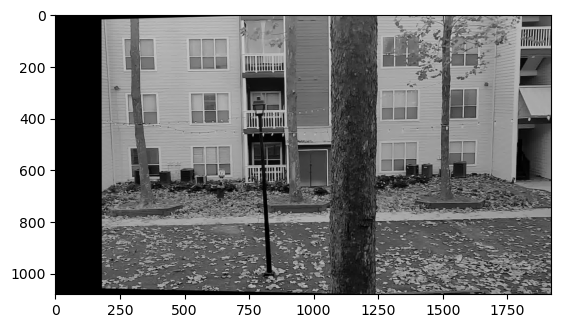

Strongest 30% matches


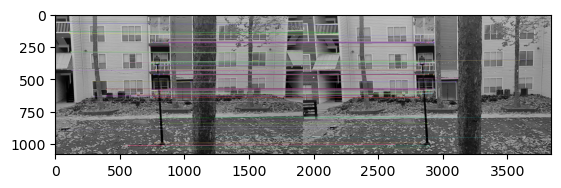

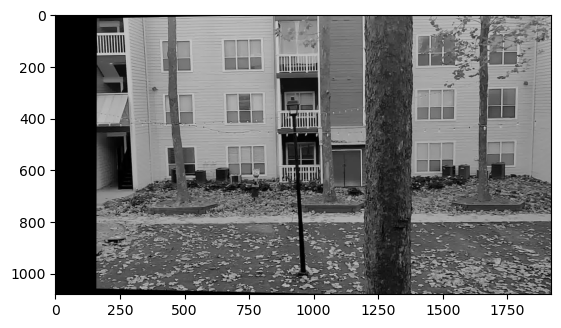

Strongest 30% matches


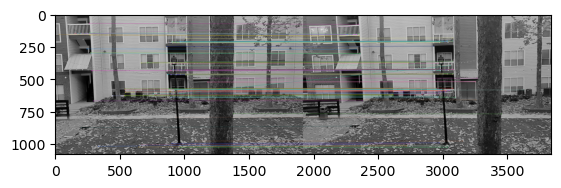

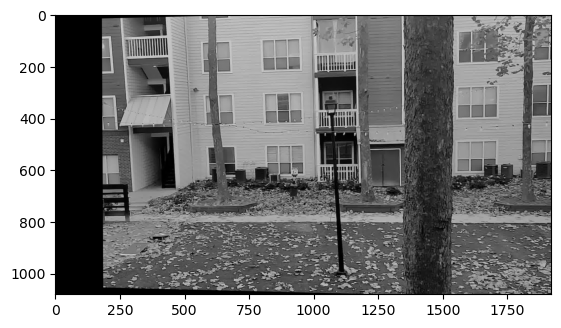

Strongest 30% matches


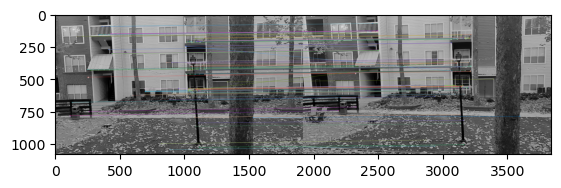

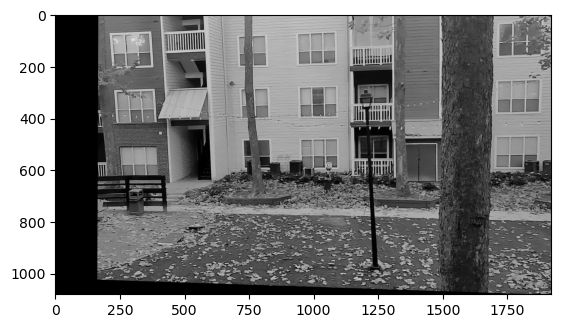

Strongest 30% matches


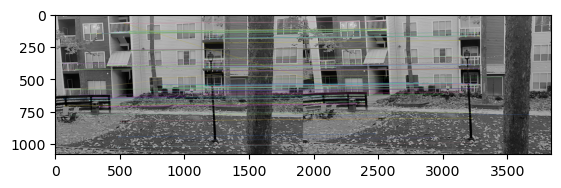

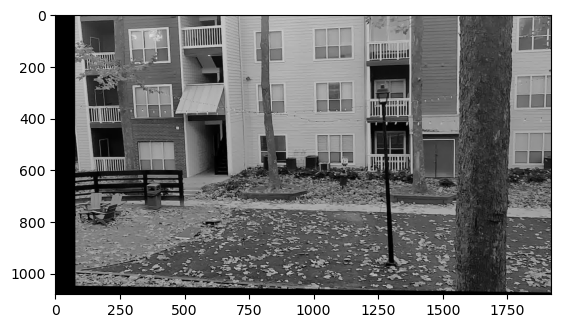

In [8]:
 
prev_Frame = cv2.imread(images[0])

for i in range(1,11):
    cur_frame = cv2.imread(images[i]) 
    img = img_align(prev_Frame, cur_frame)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    prev_Frame = cur_frame



In [9]:
motion_est(cv2.imread(images[9]), cv2.imread(images[10])) 

C:\Users\kanya\AppData\Local\Temp\ipykernel_22236\2507848593.py:17: RuntimeWarning: divide by zero encountered in true_divide
  u=np.divide(abs(It),np.sqrt(np.square(Ix)+np.square(Iy)))
C:\Users\kanya\AppData\Local\Temp\ipykernel_22236\2507848593.py:17: RuntimeWarning: invalid value encountered in true_divide
  u=np.divide(abs(It),np.sqrt(np.square(Ix)+np.square(Iy)))


array([[[19.26504   , 19.26504   , 19.26504   ],
        [19.265045  , 19.265045  , 19.265045  ],
        [29.299389  , 29.299389  , 29.299389  ],
        ...,
        [18.94873   , 18.94873   , 18.94873   ],
        [14.1781645 , 14.1781645 , 14.1781645 ],
        [18.816063  , 18.816063  , 18.816063  ]],

       [[19.265034  , 19.265034  , 19.265034  ],
        [19.265034  , 19.265034  , 19.265034  ],
        [29.299406  , 29.299406  , 29.299406  ],
        ...,
        [18.94873   , 18.94873   , 18.94873   ],
        [14.1781645 , 14.1781645 , 14.1781645 ],
        [18.816063  , 18.816063  , 18.816063  ]],

       [[31.129524  , 31.129524  , 31.129524  ],
        [31.129524  , 31.129524  , 31.129524  ],
        [79.90307   , 79.90307   , 79.90307   ],
        ...,
        [20.360292  , 20.360292  , 20.360292  ],
        [16.357084  , 16.357084  , 16.357084  ],
        [21.4375    , 21.4375    , 21.4375    ]],

       ...,

       [[22.980806  , 22.980806  , 22.980806  ],
        [22

## Question 3

### Optical Flow Vectors

In [10]:
def draw_vectors(img, flow, step=16):

    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T

    lines = np.vstack([x, y, x-fx, y-fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)

    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(img_bgr, lines, 0, (0, 255, 0))

    for (x1, y1), (_x2, _y2) in lines:
        cv2.circle(img_bgr, (x1, y1), 1, (0, 255, 0), -1)

    return img_bgr


In [15]:
n = 31  #will determine the frame picked; use 30 10 or 1

In [16]:
cap = cv2.VideoCapture('./Q1/Q1_input.mp4')

success, prev = cap.read()
prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

count = 0
while success:

    success, img = cap.read()
    if(success and count%n == 0):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Calculates dense optical flow by Farneback method
        flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        prevgray = gray
        cv2.imshow('flow', draw_vectors(gray, flow))
    
    count += 1
    key = cv2.waitKey(1)
    if key == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


## Question 4

### Feature based object detection

In [27]:
orb = cv2.ORB_create(nfeatures=1000)

imgs =[]
classname = []

myList = os.listdir("./Q4/Objects")
print('Total classes detected ', len(myList))

for obj in myList:
    imgCur = cv2.imread(f'{"./Q4/Objects"}/{obj}',0)
    imgs.append(imgCur)
    classname.append(os.path.splitext(obj)[0])
print(classname)

#finding descriptors
def findDes(imgs):
    desList=[]
    for pic in imgs:
        kp,des = orb.detectAndCompute(pic,None)
        desList.append(des)
    return desList

Total classes detected  2
['Coffee', 'Spray_Bottle']


In [28]:
def objIdentifier(img, desList, threshold = 15):
    kp2, des2 = orb.detectAndCompute(img, None)
    bf = cv2.BFMatcher()
    numMatch = []
    maxVal = -1
    try:
        for des1 in desList:
            matches = bf.knnMatch(des1, des2, k=2)
            #good ratio test
            good = []
            for m,n in matches:
                if m.distance < 0.75 * n.distance:
                    good.append([m])
            numMatch.append(len(good))
    except:
        pass

    if len(numMatch) != 0 :
        if max(numMatch) > threshold:
            maxVal = numMatch.index(max(numMatch))
    return maxVal

In [29]:
desList = findDes(imgs)
print(len(desList))

2


In [30]:
cap = cv2.VideoCapture(0)

while True:

    success, frame = cap.read()
    frame_ = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    id = objIdentifier(frame_,desList)

    if id != -1:
        cv2.putText(frame, classname[id], (60,60), cv2.FONT_HERSHEY_PLAIN, 4, (0,255,0), 4)

    cv2.imshow("Video",frame)
    key = cv2.waitKey(5)
    if key == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

## Question 5
### Face Recognition

In [31]:
import face_recognition
import os

In [32]:
#will be used to find image encodings
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

def facereg(img):
 
    path = './Q5/face_images'
    images = []
    classNames = []
    myList = os.listdir(path)
    print(myList)
    for cl in myList:
        curImg = cv2.imread(f'{path}/{cl}')
        images.append(curImg)
        classNames.append(os.path.splitext(cl)[0])
    print(classNames)
    

#just to make sure encodings are done-----------------------------
    encodeListKnown = findEncodings(images)
    print('Encoding Complete')  
#-------------------------------------------------------------------

    face_locations = []
    face_encodings = []
    face_names = []
    count = 0
    for frame in img:

        # Resize frame of video to 1/4 size for faster face recognition processing
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

        # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
        rgb_small_frame = small_frame[:, :, ::-1]


            # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame,number_of_times_to_upsample=2)
            # model='cnn'
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
                # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(encodeListKnown, face_encoding)
            name = "Unknown"

                # # If a match was found in known_face_encodings, just use the first one.
                # if True in matches:
                # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(encodeListKnown, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = classNames[best_match_index]

            face_names.append(name)


            # Display the results
            for (top, right, bottom, left), name in zip(face_locations, face_names):
                # Scale back up face locations since the frame we detected in was scaled to 1/4 size
                top *= 4
                right *= 4
                bottom *= 4
                left *= 4

                # Draw a box around the face
                cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

                face_scrape = []

                for pers in face_names:
                    if not pers=="Unknown":
                        face_scrape.append(pers)

                # Draw a label with a name below the face
                cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
                font = cv2.FONT_HERSHEY_DUPLEX
                cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

            # Display the resulting image
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
        cv2.imwrite("./Q5/Image"+str(count)+".png",frame)
        count+=1


['Ayush.jpg']
['Ayush']
Encoding Complete


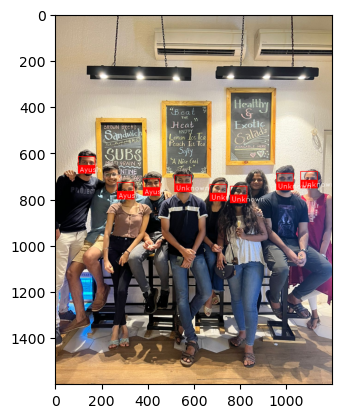

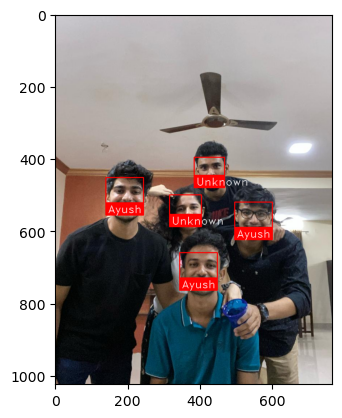

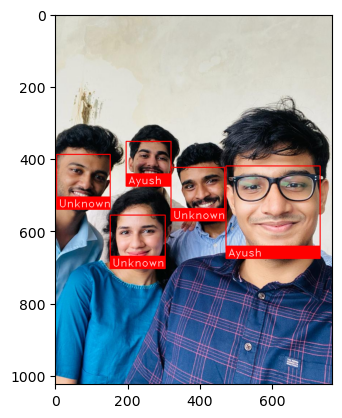

In [33]:
#loading images
img =[
    "./Q5/testimg.jpeg",
    "./Q5/testimg1.jpeg",
    "./Q5/testimg2.jpeg"
  ]

images = []
for i in img:
    images.append(cv2.imread(i))
    
facereg(images)

#### the confusion matrix parameters are:
##### TrueNegative(TN) (10) FalsePositive(FP) (6) FalseNegative((FN)(1) TruePositive(TP)(2)

In [29]:
tn,fp,fn,tp = 10,6,1,2


In [30]:
accuracy = (tn+tp)/(tn+tp+fn+fp)
print(accuracy)

0.631578947368421


In [31]:
precision = tp/(tp+fp)
print(precision) #low as there were not enough data on truePositive set (i.e my face(3) in the set of 20 (15%))

0.25


In [34]:
recall = tp/(tp+fn)
print(recall)

0.6666666666666666


In [35]:
IoU = 18/20 #18 faces were detected out of the 20 faces
print(IoU)

0.9


## Question 6
### Disparity based depth estimation 
#### Actual distance 141.3 cm

In [34]:
# Open the image files.
img1_color = cv2.imread("./Q6/Capture Helper/picture_left0.png")  
img2_color = cv2.imread("./Q6/Capture Helper/picture_right0.png")   
# Convert to grayscale.
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape

In [36]:
# Create ORB detector with 1000 features.
orb_detector = cv2.ORB_create(1000)
kp1, d1 = orb_detector.detectAndCompute(img1, None)
kp2, d2 = orb_detector.detectAndCompute(img2, None)

In [37]:
# Match features between the two images.
# We create a Brute Force matcher with
# Hamming distance as measurement mode.
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = matcher.match(d1, d2)
 
# Sort matches on the basis of their Hamming distance.
matches = sorted(matches, key = lambda x: x.distance)
 

 
index_kp1 = matches[0].queryIdx
index_kp2 = matches[0].trainIdx

(x1, y1) = kp1[index_kp1].pt
(x2, y2) = kp2[index_kp2].pt

In [38]:
matches_transformed = cv2.drawMatches(img1, kp1, img2, kp2, matches[:1], img2, flags=2)

#marking the points on 2 images
img1_color = cv2.rectangle(img1_color,(int(x1),int(y1)),(int(x1)+5,int(y1)+5),(0,255,0),3)
img2_color = cv2.rectangle(img2_color,(int(x2),int(y2)),(int(x2)+5,int(y2)+5),(0,255,0),3)

The distance in cm is : 141.7252228491508


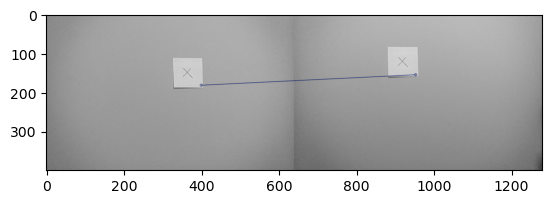

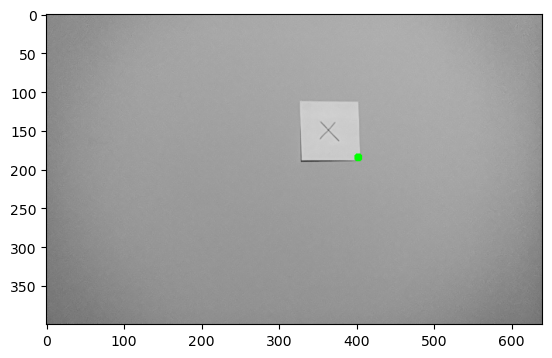

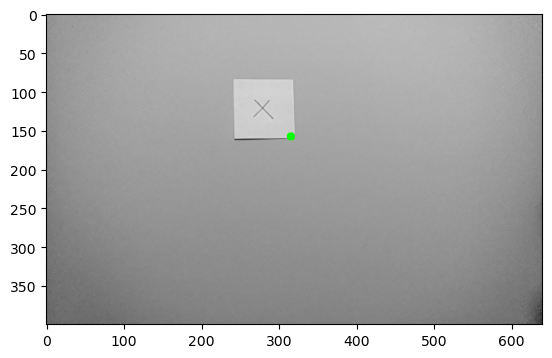

In [48]:
#Distance between the two cameras
t = 7.5
#Focal length
f = 1.636331765375964e+03

#calculating depth using disparity equation
d = (t * f)/(x1 - x2)

print("The distance in cm is : "+str(d))

# Save the output.
cv2.imwrite('output.jpg', matches_transformed)
plt.imshow(matches_transformed)
plt.show()
plt.imshow(img1_color)
plt.show()
plt.imshow(img2_color)
plt.show()